In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
dataset=pd.read_csv('All_Pokemon.csv')

In [3]:
dataset.head()

Number           Name Type 1  Type 2                    Abilities  HP  Att  \
0       1      Bulbasaur  Grass  Poison  ['Chlorophyll', 'Overgrow']  45   49   
1       2        Ivysaur  Grass  Poison  ['Chlorophyll', 'Overgrow']  60   62   
2       3       Venusaur  Grass  Poison  ['Chlorophyll', 'Overgrow']  80   82   
3       3  Mega Venusaur  Grass  Poison                ['Thick Fat']  80  100   
4       4     Charmander   Fire     NaN     ['Blaze', 'Solar Power']  39   52   

   Def  Spa  Spd  ...  Against Bug  Against Rock  Against Ghost  \
0   49   65   65  ...          1.0           1.0            1.0   
1   63   80   80  ...          1.0           1.0            1.0   
2   83  100  100  ...          1.0           1.0            1.0   
3  123  122  120  ...          1.0           1.0            1.0   
4   43   60   50  ...          0.5           2.0            1.0   

   Against Dragon  Against Dark Against Steel  Against Fairy  Height  Weight  \
0             1.0           1.0           1.0            0.5     0.7     6.9   
1             1.0           1.0           1.0            0.5     1.0    13.0   
2             1.0           1.0           1.0            0.5     2.0   100.0   
3             1.0           1.0           1.0            0.5     2.4   155.5   
4             1.0           1.0           0.5            0.5     0.6     8.5   

    BMI  
0  14.1  
1  13.0  
2  25.0  
3  27.0  
4  23.6  

[5 rows x 44 columns]

In [6]:
#dataset.corr()

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number                   1032 non-null   int64  
 1   Name                     1032 non-null   object 
 2   Type 1                   1032 non-null   object 
 3   Type 2                   548 non-null    object 
 4   Abilities                1032 non-null   object 
 5   HP                       1032 non-null   int64  
 6   Att                      1032 non-null   int64  
 7   Def                      1032 non-null   int64  
 8   Spa                      1032 non-null   int64  
 9   Spd                      1032 non-null   int64  
 10  Spe                      1032 non-null   int64  
 11  BST                      1032 non-null   int64  
 12  Mean                     1032 non-null   float64
 13  Standard Deviation       1032 non-null   float64
 14  Generation              

In [8]:
dataset.fillna(0,inplace=True)

In [10]:
dataset.drop(dataset.select_dtypes(['object']).columns, inplace = True, axis=1)

In [11]:
dataset.head()

Number  HP  Att  Def  Spa  Spd  Spe  BST        Mean  Standard Deviation  \
0       1  45   49   49   65   65   45  318   53.000000            8.640988   
1       2  60   62   63   80   80   60  405   67.500000            8.902247   
2       3  80   82   83  100  100   80  525   87.500000            8.902247   
3       3  80  100  123  122  120   80  625  104.166667           18.747592   
4       4  39   52   43   60   50   65  309   51.500000            8.995369   

   ...  Against Bug  Against Rock  Against Ghost  Against Dragon  \
0  ...          1.0           1.0            1.0             1.0   
1  ...          1.0           1.0            1.0             1.0   
2  ...          1.0           1.0            1.0             1.0   
3  ...          1.0           1.0            1.0             1.0   
4  ...          0.5           2.0            1.0             1.0   

   Against Dark  Against Steel  Against Fairy  Height  Weight   BMI  
0           1.0            1.0            0.5     0.7     6.9  14.1  
1           1.0            1.0            0.5     1.0    13.0  13.0  
2           1.0            1.0            0.5     2.0   100.0  25.0  
3           1.0            1.0            0.5     2.4   155.5  27.0  
4           1.0            0.5            0.5     0.6     8.5  23.6  

[5 rows x 39 columns]

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number                   1032 non-null   int64  
 1   HP                       1032 non-null   int64  
 2   Att                      1032 non-null   int64  
 3   Def                      1032 non-null   int64  
 4   Spa                      1032 non-null   int64  
 5   Spd                      1032 non-null   int64  
 6   Spe                      1032 non-null   int64  
 7   BST                      1032 non-null   int64  
 8   Mean                     1032 non-null   float64
 9   Standard Deviation       1032 non-null   float64
 10  Generation               1032 non-null   float64
 11  Experience to level 100  1032 non-null   int64  
 12  Final Evolution          1032 non-null   float64
 13  Catch Rate               1032 non-null   int64  
 14  Legendary               

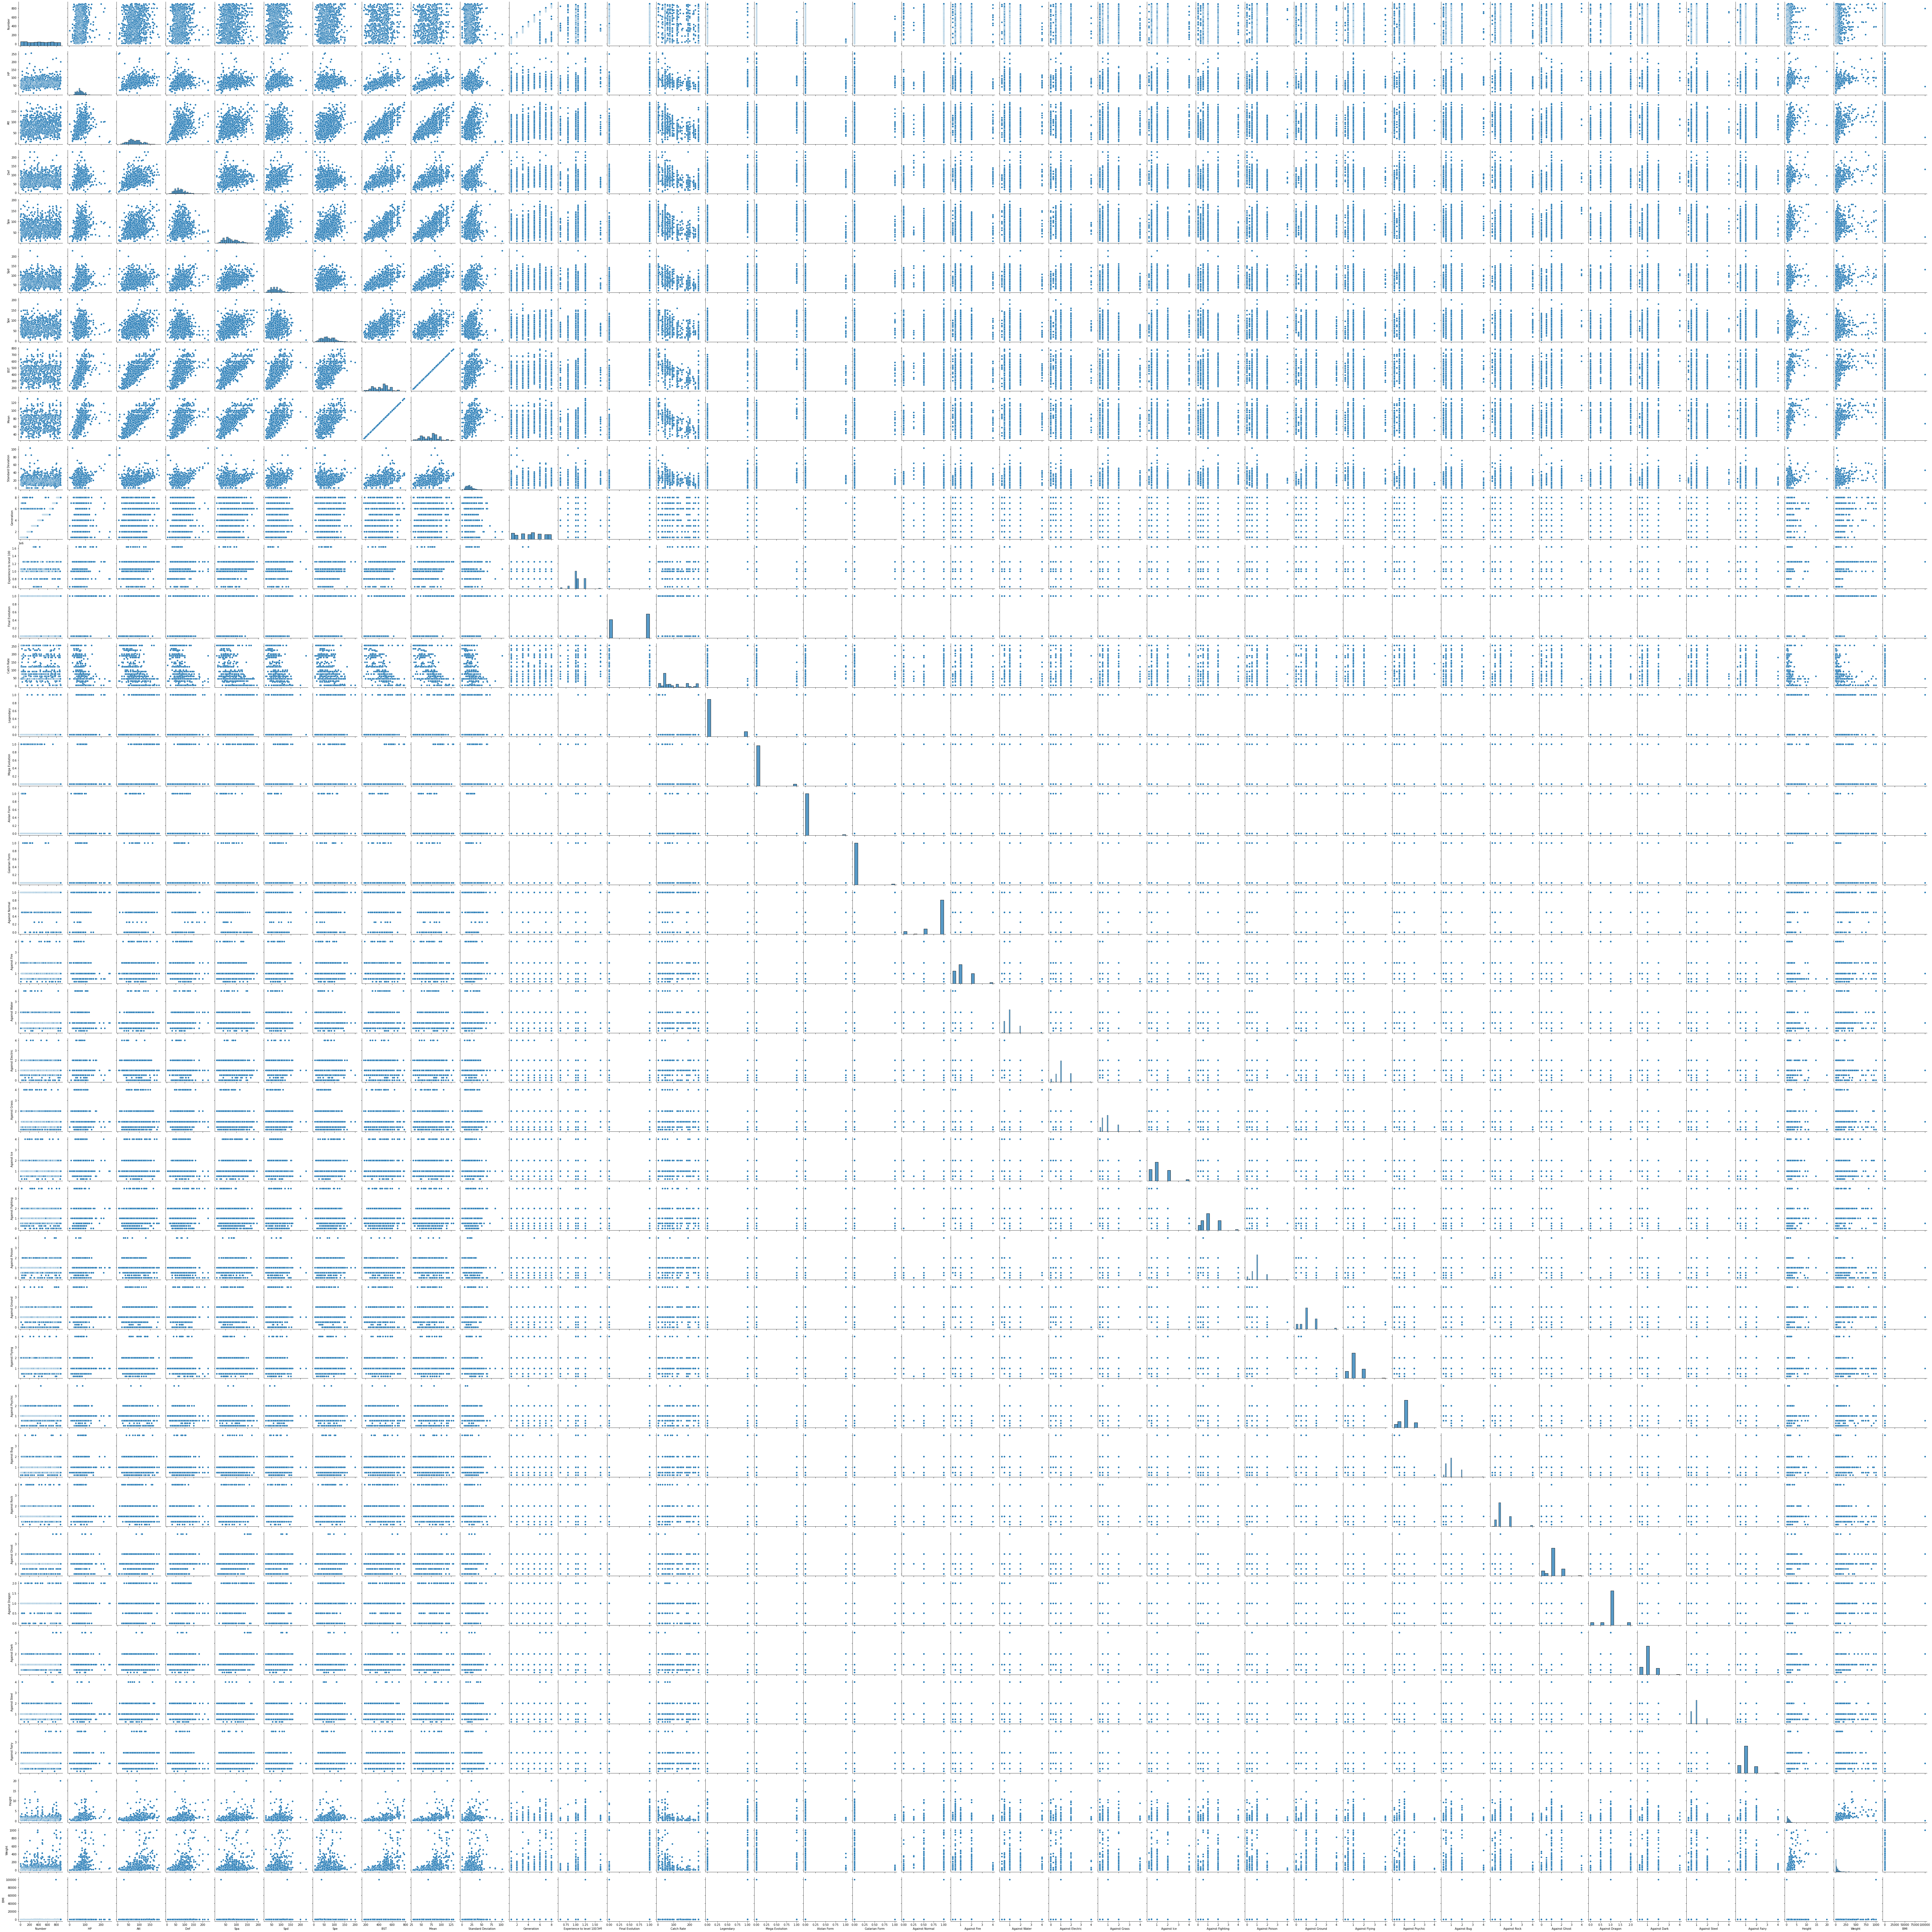

In [41]:
sns.pairplot(dataset)

In [20]:
scaler = StandardScaler()
data= scaler.fit_transform(dataset)
print (pd.DataFrame(data))

            0         1         2         3         4         5         6   \
0    -1.674254 -0.951466 -0.969242 -0.829028 -0.241733 -0.258562 -0.779624   
1    -1.670434 -0.378432 -0.569570 -0.375821  0.216176  0.284671 -0.283015   
2    -1.666613  0.385613  0.045312  0.271617  0.826721  1.008981  0.379129   
3    -1.666613  0.385613  0.598705  1.566492  1.498320  1.733291  0.379129   
4    -1.662793 -1.180679 -0.877010 -1.023259 -0.394370 -0.801794 -0.117479   
...        ...       ...       ...       ...       ...       ...       ...   
1027  1.745112  1.149658  1.982188  1.793096 -0.241733  1.371136 -1.276232   
1028  1.748932  1.149658 -0.477337 -0.472937  2.200447  0.284671  2.034491   
1029  1.752753  1.149658 -0.016176  0.174501  0.216176  0.284671  0.379129   
1030  1.752753  1.149658  2.597069  2.440533  0.368812  2.095446 -0.614088   
1031  1.752753  1.149658  0.137544  0.174501  2.810992  1.008981  2.696635   

            7         8         9   ...        29        30    

In [30]:
def kmeans(X, k, max_iters=50):
    centroids = X[np.random.choice(len(X), k, replace=False)]
    
    for _ in range(max_iters):
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
    
    return centroids, labels

In [31]:
def calculate_ssd(X, centroids, labels):
    ssd = 0
    for i in range(len(centroids)):
        ssd += np.sum((X[labels == i] - centroids[i])**2)
    return ssd

In [32]:
def find_optimal_k(X, max_k=10):
    ssd_values = []
    for k in range(1, max_k + 1):
        centroids, labels = kmeans(X, k)
        ssd = calculate_ssd(X, centroids, labels)
        ssd_values.append(ssd)
    
    return ssd_values

In [33]:
def plot_elbow(ssd_values):
    plt.plot(range(1, len(ssd_values) + 1), ssd_values, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Sum of Squared Distances (SSD)')
    plt.show()

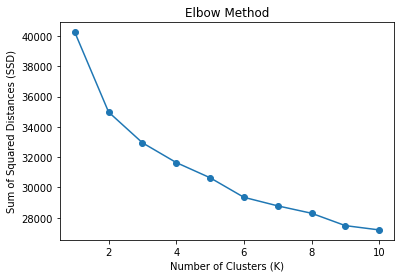

In [38]:
max_clusters = 10
ssd_values = find_optimal_k(data, max_k=max_clusters)
plot_elbow(ssd_values)
optimal_k = 4

In [48]:
centroids, labels = kmeans(data, optimal_k)

In [49]:
def plot_clusters(X, labels):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='turbo')
    plt.title('K-means Clustering (PCA)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

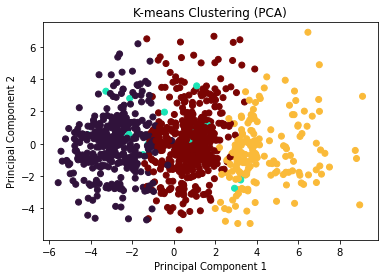

In [50]:
plot_clusters(data, labels)